In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

import commonmodules as cm

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


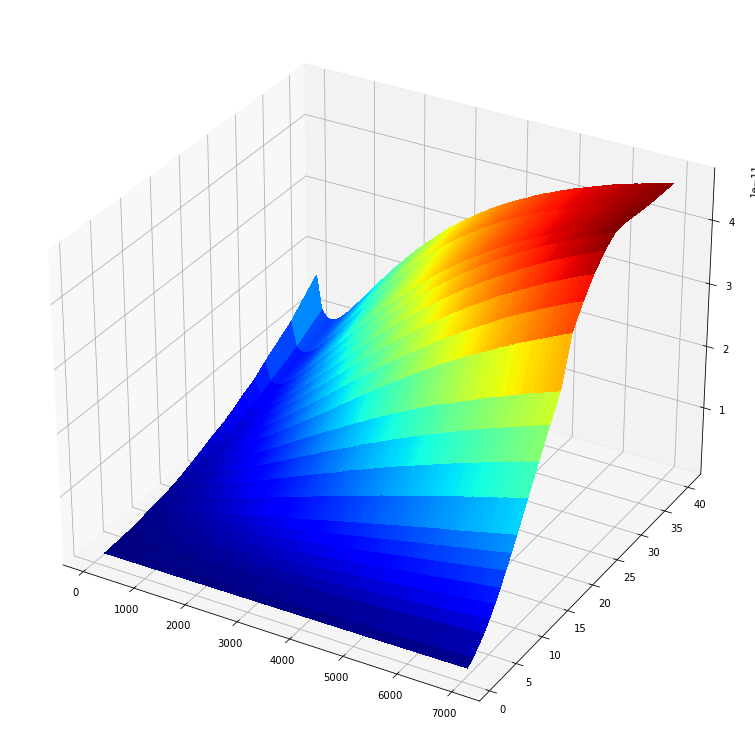

In [19]:
filename = "N2N2_dataset.xls"
df, vib_values , temp_values = cm.filterinitialset (filename)
cm.plotfull3dcurve (df, vib_values, temp_values)

In [20]:
maxt = max(temp_values)
mint = min(temp_values)

minv = min(vib_values)
maxv = max(vib_values)

train_xy = []
train_z = []

maxz = float("-inf")
minz = float("+inf")

for tidx, t in enumerate(temp_values):
    for vidx, v in enumerate(vib_values):
        zval = df[t].values[vidx]

        if zval < minz:
            minz = zval
        elif zval > maxz:
            maxz = zval

for tidx, t in enumerate(temp_values):
    tnorm = (t - mint)/(maxt - mint)
    #print(t, " ", tnorm)

    for vidx, v in enumerate(vib_values):
        vnorm  = (v - minv)/(maxv - minv)
    
        train_xy.append([tnorm, vnorm])
        
        z = df[t].values[vidx]
        znorm = (z - minz)/(maxz - minz)
        train_z.append(znorm)

        #print("  %10.2f %10.7f ==> %10.7e %10.7f"%(v, vnorm, z, znorm ))

train_xy = np.asarray(train_xy)
train_z = np.asarray(train_z)

"""
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(train_z.shape[0]):
    x = train_xy[i,0]
    y = train_xy[i,1]
    z = train_z[i]
    ax.scatter(x, y, z, marker="o", color="r")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.gcf().set_size_inches(20, 15)

plt.show()
"""

'\nfig = plt.figure()\nax = fig.add_subplot(projection=\'3d\')\n\nfor i in range(train_z.shape[0]):\n    x = train_xy[i,0]\n    y = train_xy[i,1]\n    z = train_z[i]\n    ax.scatter(x, y, z, marker="o", color="r")\n\nax.set_xlabel(\'X Label\')\nax.set_ylabel(\'Y Label\')\nax.set_zlabel(\'Z Label\')\nplt.gcf().set_size_inches(20, 15)\n\nplt.show()\n'

In [21]:

from sklearn.model_selection import train_test_split

usevalidation = False
history = None
nepochs = 100

model = cm.build_model_NN()

if usevalidation:
    X_train, X_val, y_train, y_val \
            = train_test_split(train_xy, train_z, \
            test_size=0.33, random_state=42)

    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=nepochs, verbose=0)
else:
    history = model.fit(train_xy, train_z, epochs=nepochs, verbose=0)

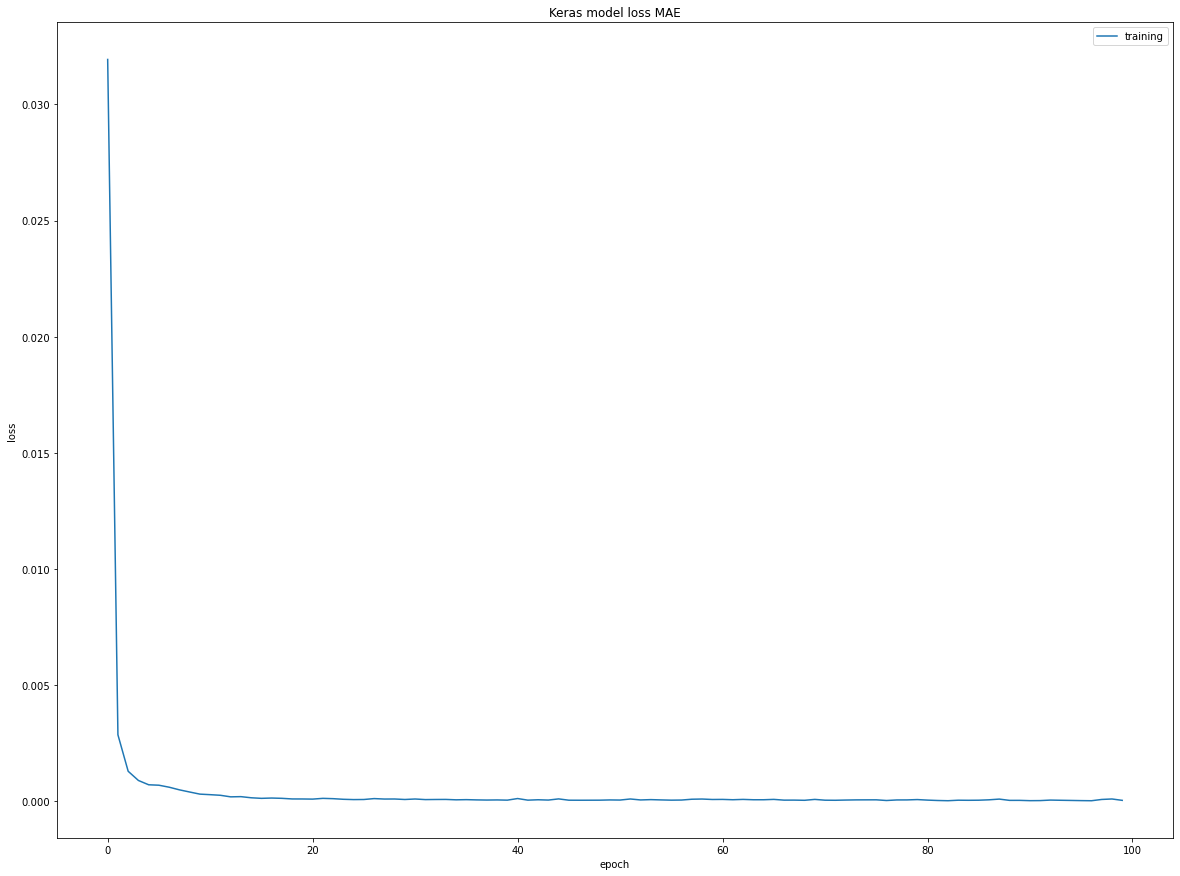

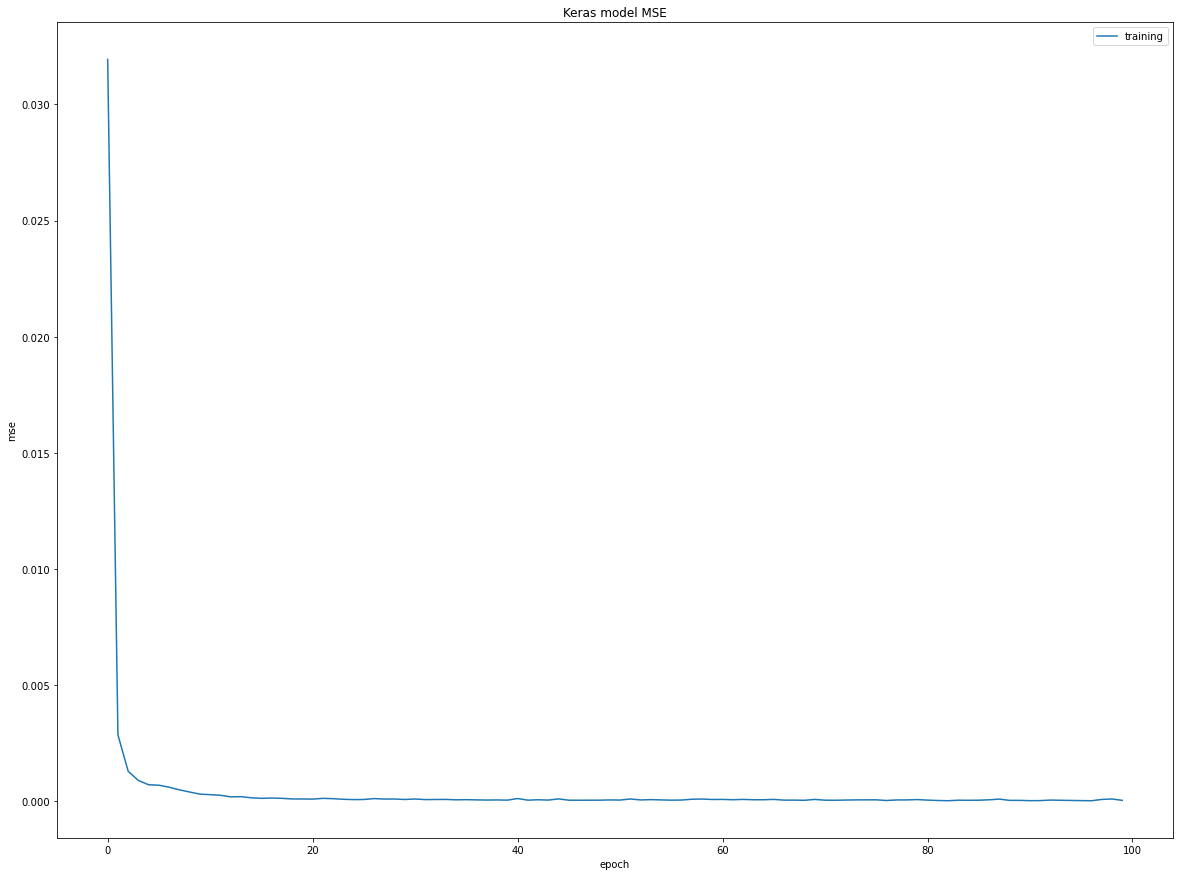

In [22]:
plt.title('Keras model loss MAE')
plt.plot(history.history['loss'])
if usevalidation:
    plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.gcf().set_size_inches(20, 15)

plt.show()

plt.clf()
plt.title('Keras model MSE')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.plot(history.history['mse'])
if usevalidation:
    plt.plot(history.history['val_mse'])
plt.legend(['training', 'validation'], loc='upper right')
plt.gcf().set_size_inches(20, 15)

plt.show()

In [23]:
# Compute the output 
test_xy = []

test_xy = train_xy

z_pred = model.predict(train_xy)

46/46 [==============================] - 0s 7ms/step


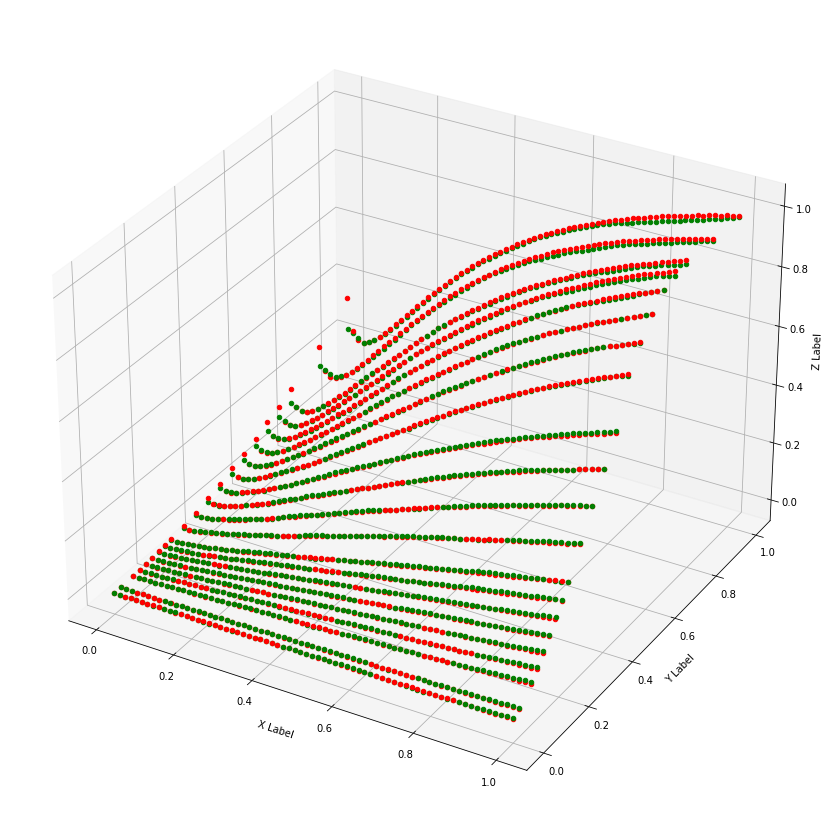

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(train_z.shape[0]):
    x = train_xy[i,0]
    y = train_xy[i,1]
    z = train_z[i]
    ax.scatter(x, y, z, marker="o", color="r")

for i in range(train_z.shape[0]):
    x = test_xy[i,0]
    y = test_xy[i,1]
    z = z_pred[i]
    ax.scatter(x, y, z, marker="o", color="g")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.gcf().set_size_inches(20, 15)

plt.show()

In [25]:
for i in range(train_z.shape[0]):
    x = train_xy[i,0]
    y = train_xy[i,1]
    z = train_z[i]
    zpred = z_pred[i]

    diff = 100.0*(math.fabs(zpred-z) / (math.fabs(zpred+z)/2))

    if diff > 1.0e-2:
        print("%6.2f, %10.7e , %10.7e"%(diff, z, zpred))

112.36, 7.2209527e-05 , 2.5737565e-04
 36.51, 8.8987622e-04 , 1.2873663e-03
  7.77, 3.5297716e-03 , 3.2657450e-03
  6.77, 5.1226288e-03 , 4.7873138e-03
 10.96, 7.6712003e-03 , 6.8740984e-03
 19.51, 1.0432153e-02 , 8.5780984e-03
 21.22, 1.4318724e-02 , 1.1571650e-02
 14.54, 1.7525677e-02 , 1.5150125e-02
 20.95, 2.1560915e-02 , 1.7471332e-02
 24.46, 2.8994249e-02 , 2.2674371e-02
 19.62, 3.9613297e-02 , 3.2537051e-02
 27.48, 5.4692345e-02 , 4.1477133e-02
 25.96, 6.9983774e-02 , 5.3902600e-02
 28.19, 8.8885680e-02 , 6.6925533e-02
 23.05, 1.0162854e-01 , 8.0628023e-02
 22.54, 1.2095520e-01 , 9.6451491e-02
 24.90, 1.4516663e-01 , 1.1302246e-01
 24.01, 1.6406854e-01 , 1.2890342e-01
 29.38, 1.9528854e-01 , 1.4525478e-01
 30.19, 2.6091426e-01 , 1.9248167e-01
 38.16, 3.5223807e-01 , 2.3936555e-01
200.00, 0.0000000e+00 , 1.2263376e-04
 48.83, 6.4563812e-04 , 1.0626828e-03
 18.18, 2.7652001e-03 , 3.3181170e-03
 16.81, 4.1244383e-03 , 4.8812823e-03
  9.21, 6.0571050e-03 , 6.6421246e-03
  3.38, 8.05

In [26]:
# remove temp
overallmse = 0.0
tot = 0

fp = open("removingtemp_nn.txt", "w")
for trm in temp_values:
    temp_torm = [trm]

    train_xy, train_z, test_xy, test_z = cm.get_train_and_test_rmt (temp_values, vib_values, \
        df, temp_torm)

    modelt = cm.build_model_NN()

    history = None
    nepochs = 100
    history = modelt.fit(train_xy, train_z, epochs=nepochs, verbose=0)

    z_pred = modelt.predict(train_xy)

    mse = 0.0
    for i in range(test_z.shape[0]):
        x = test_xy[i,0]
        y = test_xy[i,1]
        z = test_z[i]
        zpred = z_pred[i]

        mse += (zpred-z)**2
        overallmse += (zpred-z)**2
        tot += 1

        print("%10.7f , %10.7f , %10.7f , %10.7f"%(z, y, z, zpred), file=fp)

    print("Removed ", trm, " MSE ", mse/float(i), file=fp, flush=True)
    print("Removed ", trm, " MSE ", mse/float(i))

print("Overall MSE ", overallmse/float(tot), file=fp)

46/46 [==============================] - 0s 5ms/step
Removed  100  MSE  [0.00266147]
46/46 [==============================] - 1s 10ms/step
Removed  200  MSE  [6.635087e-05]
46/46 [==============================] - 0s 4ms/step
Removed  300  MSE  [0.0003518]
46/46 [==============================] - 0s 5ms/step
Removed  400  MSE  [4.426592e-05]
46/46 [==============================] - 1s 7ms/step
Removed  500  MSE  [7.526482e-05]
46/46 [==============================] - 1s 9ms/step
Removed  600  MSE  [0.00010925]
46/46 [==============================] - 0s 5ms/step
Removed  700  MSE  [0.0009336]
46/46 [==============================] - 0s 7ms/step
Removed  800  MSE  [0.00103756]
46/46 [==============================] - 0s 5ms/step
Removed  900  MSE  [0.00207279]
46/46 [==============================] - 0s 7ms/step
Removed  1000  MSE  [0.00288261]
46/46 [==============================] - 0s 6ms/step
Removed  1100  MSE  [0.00235894]
46/46 [==============================] - 0s 7ms/step
Remov

In [27]:
overallmse = 0.0
tot = 0
fp = open("removingvib_nn.txt", "w")

for vrm in vib_values:
    vib_torm = [vrm]

    train_xy, train_z, test_xy, test_z = cm.get_train_and_test_rmv (temp_values, vib_values, \
        df, vib_torm)

    modelv = cm.build_model_NN()

    history = None
    nepochs = 100
    history = modelv.fit(train_xy, train_z, epochs=nepochs, verbose=0)

    z_pred = modelv.predict(train_xy)

    mse = 0.0
    for i in range(test_z.shape[0]):
        x = test_xy[i,0]
        y = test_xy[i,1]
        z = test_z[i]
        zpred = z_pred[i]
        
        mse += (zpred-z)**2
        overallmse += (zpred-z)**2
        tot += 1
    
        print("%10.7f , %10.7f , %10.7f , %10.7f"%(z, y, z, zpred), file=fp)

    print("Removed ", vrm, " ", mse/float(i), file=fp)
    print("Removed ", vrm, " ", mse/float(i))

print("Overall MSE ", overallmse/float(tot), file=fp)

44/44 [==============================] - 0s 6ms/step
Removed  1   [0.00886136]
44/44 [==============================] - 0s 4ms/step
Removed  2   [0.00597509]
44/44 [==============================] - 0s 4ms/step
Removed  4   [0.00402843]
44/44 [==============================] - 0s 7ms/step
Removed  5   [0.00404083]
44/44 [==============================] - 0s 5ms/step
Removed  6   [0.00592282]
44/44 [==============================] - 0s 6ms/step
Removed  7   [0.00624468]
44/44 [==============================] - 0s 4ms/step
Removed  8   [0.00952806]
44/44 [==============================] - 0s 4ms/step
Removed  9   [0.01397749]
44/44 [==============================] - 1s 10ms/step
Removed  10   [0.01935834]
44/44 [==============================] - 0s 8ms/step
Removed  12   [0.03692774]
44/44 [==============================] - 0s 3ms/step
Removed  14   [0.06244974]
44/44 [==============================] - 0s 6ms/step
Removed  16   [0.09085691]
44/44 [==============================] - 0s 4ms

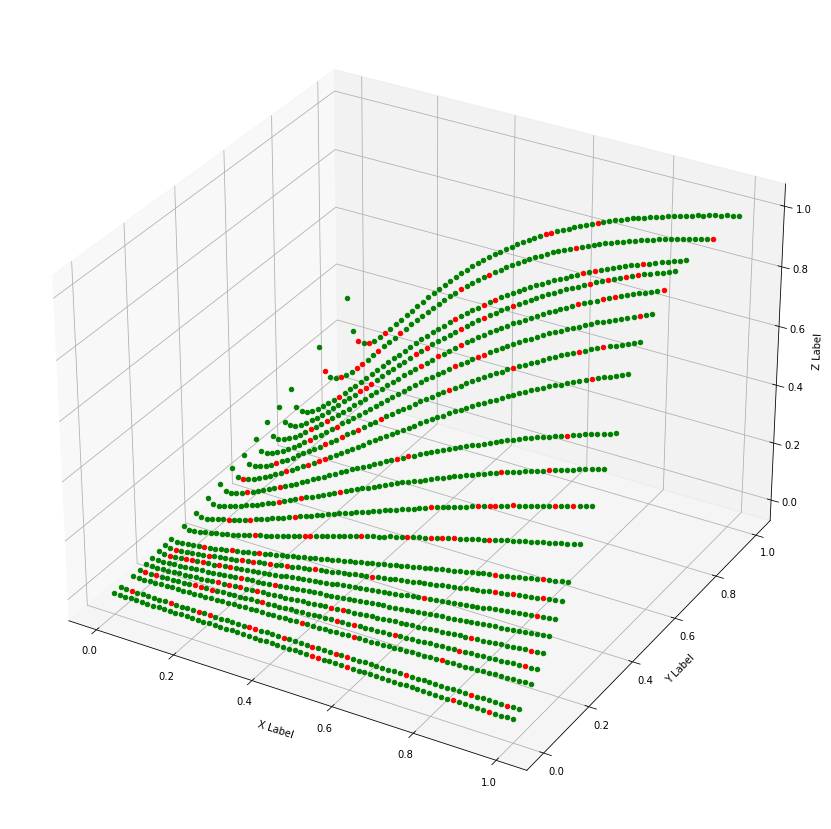

In [28]:
train_xy, train_z, test_xy, test_z = cm.get_train_and_test_random (temp_values, vib_values, \
    df, 0.1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(train_z.shape[0]):
    x = train_xy[i,0]
    y = train_xy[i,1]
    z = train_z[i]
    ax.scatter(x, y, z, marker="o", color="g")

for i in range(test_z.shape[0]):
    x = test_xy[i,0]
    y = test_xy[i,1]
    z = test_z[i]
    ax.scatter(x, y, z, marker="o", color="r")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.gcf().set_size_inches(20, 15)

plt.show()

In [29]:
modelr = cm.build_model_NN()

history = None
nepochs = 100
history = modelr.fit(train_xy, train_z, epochs=nepochs, verbose=0)

z_pred = modelr.predict(train_xy)

trainmse = 0.0
cont = 0.0
for i in range(train_z.shape[0]):
    x = train_xy[i,0]
    y = train_xy[i,1]
    z = train_z[i]
    zpred = z_pred[i]
    
    trainmse += (zpred-z)**2
    cont += 1.0

    print("Train, %10.7f , %10.7f , %10.7f , %10.7f"%(z, y, z, zpred))

trainmse = trainmse/cont

z_pred = model.predict(test_xy)

mse = 0.0
cont = 0.0
for i in range(test_z.shape[0]):
    x = test_xy[i,0]
    y = test_xy[i,1]
    z = test_z[i]
    zpred = z_pred[i]
    
    mse += (zpred-z)**2
    cont += 1.0

    print("Test, %10.7f , %10.7f , %10.7f , %10.7f"%(z, y, z, zpred))

mse = mse/cont

print("Removed random values  MSE ", mse, " , TrainMSE ,", trainmse, flush=True)

41/41 [==============================] - 0s 4ms/step
Train,  0.0000722 ,  0.0000000 ,  0.0000722 , -0.0004148
Train,  0.0008899 ,  0.0256410 ,  0.0008899 ,  0.0006113
Train,  0.0035298 ,  0.0769231 ,  0.0035298 ,  0.0022858
Train,  0.0051226 ,  0.1025641 ,  0.0051226 ,  0.0042427
Train,  0.0076712 ,  0.1282051 ,  0.0076712 ,  0.0059559
Train,  0.0104322 ,  0.1538462 ,  0.0104322 ,  0.0067597
Train,  0.0143187 ,  0.1794872 ,  0.0143187 ,  0.0103816
Train,  0.0175257 ,  0.2051282 ,  0.0175257 ,  0.0134867
Train,  0.0215609 ,  0.2307692 ,  0.0215609 ,  0.0160418
Train,  0.0289942 ,  0.2820513 ,  0.0289942 ,  0.0240174
Train,  0.0396133 ,  0.3333333 ,  0.0396133 ,  0.0341003
Train,  0.0546923 ,  0.3846154 ,  0.0546923 ,  0.0453218
Train,  0.0699838 ,  0.4358974 ,  0.0699838 ,  0.0579569
Train,  0.0888857 ,  0.4871795 ,  0.0888857 ,  0.0726107
Train,  0.1016285 ,  0.5384615 ,  0.1016285 ,  0.0871056
Train,  0.1209552 ,  0.5897436 ,  0.1209552 ,  0.1012644
Train,  0.1451666 ,  0.6410256 ,  0

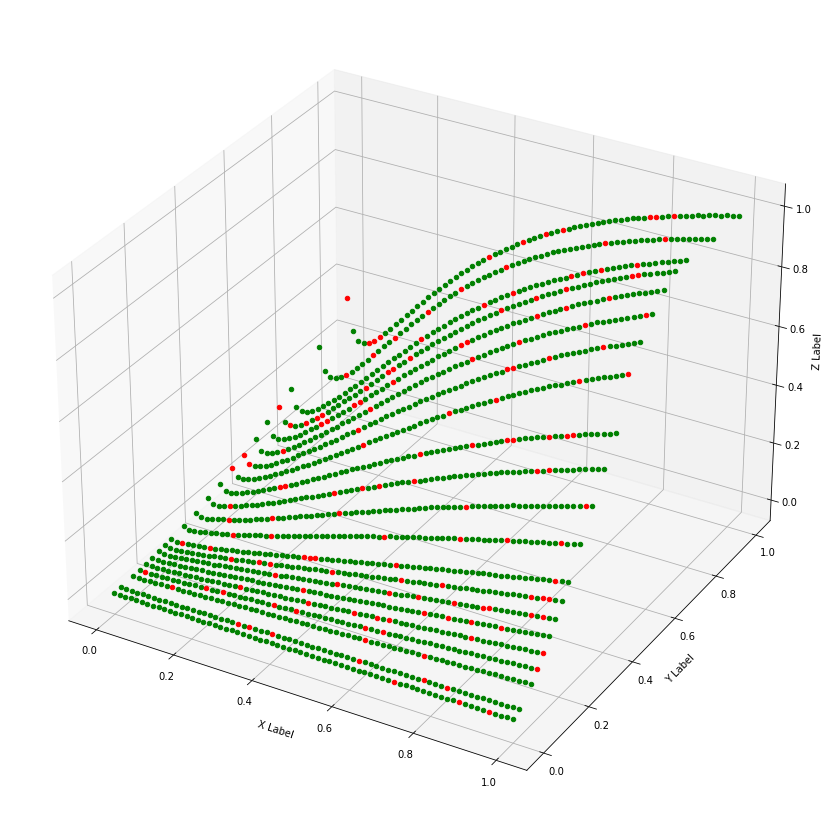

In [30]:
train_xy, train_z, test_xy, test_z = cm.get_train_and_test_random (temp_values, vib_values, \
    df, 0.1)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(train_z.shape[0]):
    x = train_xy[i,0]
    y = train_xy[i,1]
    z = train_z[i]
    ax.scatter(x, y, z, marker="o", color="g")

for i in range(test_z.shape[0]):
    x = test_xy[i,0]
    y = test_xy[i,1]
    z = test_z[i]
    ax.scatter(x, y, z, marker="o", color="r")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.gcf().set_size_inches(20, 15)

plt.show()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_576 (Dense)           (None, 100)               300       
                                                                 
 dense_577 (Dense)           (None, 100)               10100     
                                                                 
 dense_578 (Dense)           (None, 1)                 101       
                                                                 
Total params: 10,501
Trainable params: 10,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
27/27 [==============================] - 1s 7ms/step - loss: 0.0614
Epoch 2/10
27/27 [==============================] - 0s 7ms/step - loss: 0.0159
Epoch 3/10
27/27 [=============

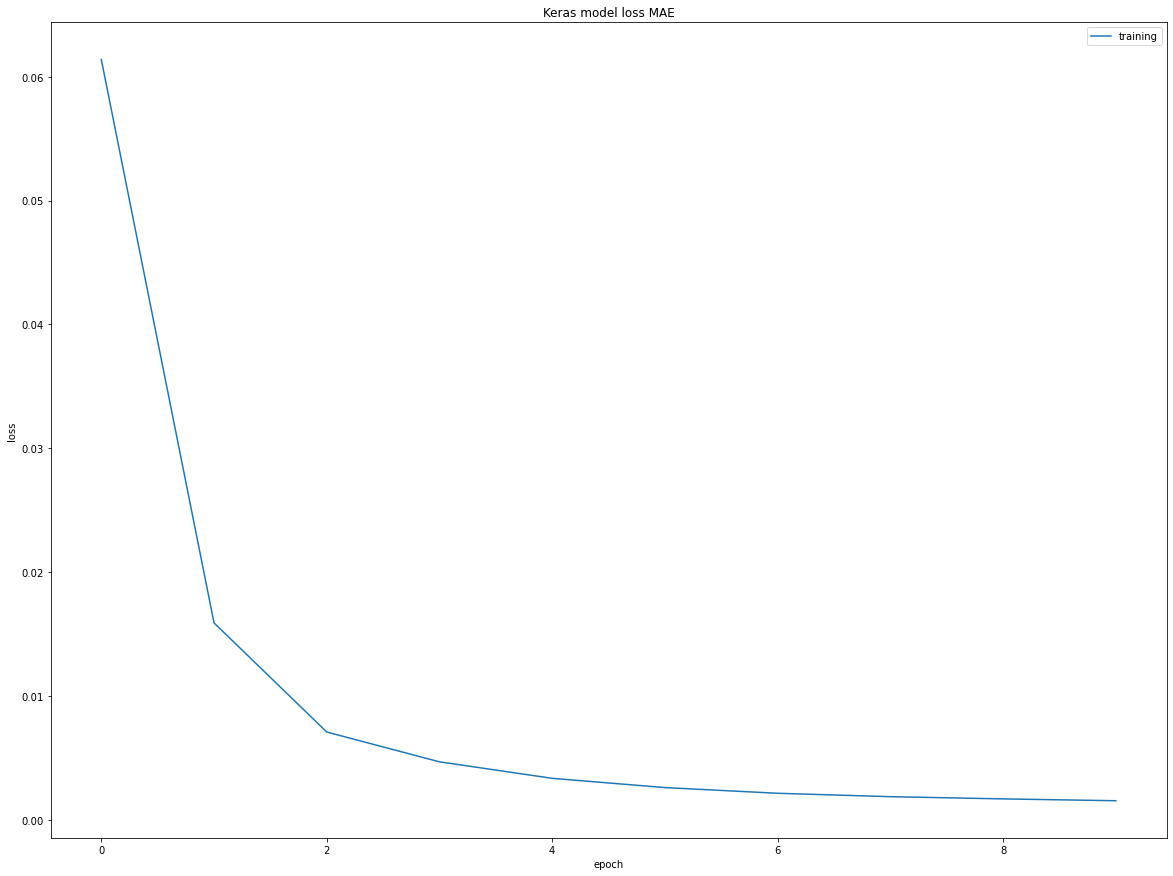

42/42 [==============================] - 0s 7ms/step
Train,  0.0000722 ,  0.0000000 ,  0.0000722 , -0.0004148
Train,  0.0008899 ,  0.0256410 ,  0.0008899 ,  0.0006113
Train,  0.0035298 ,  0.0769231 ,  0.0035298 ,  0.0022858
Train,  0.0051226 ,  0.1025641 ,  0.0051226 ,  0.0042427
Train,  0.0076712 ,  0.1282051 ,  0.0076712 ,  0.0059559
Train,  0.0104322 ,  0.1538462 ,  0.0104322 ,  0.0067597
Train,  0.0143187 ,  0.1794872 ,  0.0143187 ,  0.0103816
Train,  0.0175257 ,  0.2051282 ,  0.0175257 ,  0.0134867
Train,  0.0215609 ,  0.2307692 ,  0.0215609 ,  0.0160418
Train,  0.0289942 ,  0.2820513 ,  0.0289942 ,  0.0240174
Train,  0.0396133 ,  0.3333333 ,  0.0396133 ,  0.0341003
Train,  0.0546923 ,  0.3846154 ,  0.0546923 ,  0.0453218
Train,  0.0699838 ,  0.4358974 ,  0.0699838 ,  0.0579569
Train,  0.1209552 ,  0.5897436 ,  0.1209552 ,  0.1012643
Train,  0.1451666 ,  0.6410256 ,  0.1451666 ,  0.1186177
Train,  0.1952885 ,  0.7435897 ,  0.1952885 ,  0.1587539
Train,  0.2609143 ,  0.8717949 ,  0

In [31]:
hidden_layers_layout = [100, 100]
activation_functions = ["relu", "relu"]
epochs = 10
batch_size = 50
inoptimizer = "SGD(decay=1e-6, momentum=0.9, nesterov=True)"
loss = 'MeanSquaredError()'

model = cm.build_new_model_NN(hidden_layers_layout, activation_functions)
optimizer = cm.build_optimizer(inoptimizer)
model.compile(loss=cm.build_loss(loss), optimizer=optimizer)
model.summary()

history = model.fit(train_xy, train_z, epochs=epochs, batch_size=batch_size, verbose=1)

plt.title('Keras model loss MAE')
plt.plot(history.history['loss'])
if usevalidation:
    plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.gcf().set_size_inches(20, 15)

plt.show()

z_pred = modelr.predict(train_xy)

trainmse = 0.0
cont = 0.0
for i in range(train_z.shape[0]):
    x = train_xy[i,0]
    y = train_xy[i,1]
    z = train_z[i]
    zpred = z_pred[i]
    
    trainmse += (zpred-z)**2
    cont += 1.0

    print("Train, %10.7f , %10.7f , %10.7f , %10.7f"%(z, y, z, zpred))

trainmse = trainmse/cont

z_pred = model.predict(test_xy)

mse = 0.0
cont = 0.0
for i in range(test_z.shape[0]):
    x = test_xy[i,0]
    y = test_xy[i,1]
    z = test_z[i]
    zpred = z_pred[i]
    
    mse += (zpred-z)**2
    cont += 1.0

    print("Test, %10.7f , %10.7f , %10.7f , %10.7f"%(z, y, z, zpred))

mse = mse/cont

print("Removed random values  MSE ", mse, " , TrainMSE ,", trainmse, flush=True)
